##  <center><span style="color:darkgreen; font-size:3em;">Team ZM4</span>

#  <center><span style="color:darkgreen; font-size:1.3em;"> Unsupervised Predict - EDSA Movie Recommendation Challenge
</span>

<img src="https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/best-movies-1614634680.jpg" width="900" height="400" align="center"/>

## Table of Contents

1. <a href ="#1.-Overview">Overview</a>
2. <a href ="#2.-Problem-identification">Problem Identifiaction</a>
3. <a href ="#3.-Introduction">Introduction</a>
4. <a href ="#4.-Importing-packages">Importing Packages</a>
5. <a href ="#5.-Loading-data">Loading data</a>
6. <a href ="#6.-Cleaning-data">Cleaning data</a>
7. <a href ="#7.-Exploratory-Data-Analysis">Exploratory Data Analysis</a>
8. <a href ="#8.-Building-Models">Building Models</a>  
   8.1 <a href ="#8.1.-Content-based-filtering-recommender-system">Content based filtering recommender system</a>    
   8.2.<a href ="#8.2.-Collaborative-based-ratings-predictor">Collaborative based ratings predictor</a>  
   8.2.1 <a href ="#8.2.1.-SVD-Model">SVD Model</a>  
   8.2.2 <a href ="#8.2.2.-BaselineOnly-Model">BaselineOnly Model</a>      
   8.2.3 <a href ="#8.2.3.-NMF-Non-negative-Matrix-Factorization-Model">NMF</a>     
   8.2.4 <a href ="#8.2.4.-SlopeOne">SlopeOne</a>     
   8.2.5 <a href ="#8.2.5.-Co-Clustering">Co-Clustering</a>   
   8.2.6 <a href ="#8.2.6.-Hyper-parametertuning-on-best-models-(SVD)">Hyper parametertuning on best models (SVD)</a>   
   8.3 <a href ="#8.3.-Collaborative-based-recommender">Collaborative based recommender</a>    
9. <a href ="#9.-Conclusion">Conclusion</a>


     
  
   
   

# 1. Overview

This notebook has a dataset that consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

You can find the project overview [here](https://www.kaggle.com/c/edsa-movie-recommendation-challenge/overview).

[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 2. Problem identification

### <center> Challenge: EDSA Movie Recommendation 


**Team ZM4** was challenged by EDSA(Explore Data Science Academy), with the task of constructing a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. They are called "Unsupervised", because users do not need to supervise the model. Instead, it allows the model to work on its own to discover patterns and information that was previously undetected


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 3. Introduction

“What movies should I check out tonight?” 

Recommender systems help users select similar items when something is being chosen online. There are several companies that actually use these systems, as such the biggest companies such Netflix or Amazon would suggest to the users movies that might interest. Other companies such as Yelp use recommender systems to suggest different resturants and services. The main point to use these systems is to reach out to users by provider best customer services and improve customer satisfaction.

The current recommendation systems that are being used and are popular are the content-based filtering and collaborative filtering which works by implementing different information sources to make the recommendations.

- **Content-based filtering (CBF)** : makes recommendations based on user preferences for product features.
- **Collaborative filtering (CF)**: mimics user-to-user recommendations (i.e. it relies on how other users have responded to the same items). It predicts users preferences as a linear, weighted combination of other user preferences.

We have to note that both of these methods have **limitations**: The CBF can recommend a new item but needs more data on user preferences to give out the best match. On the other hand, the CF requires large dataset with active users who rated the product before to make the most accurate predictions. The combination of both of these methods is known as hybrid recommendation systems.


_Let’s get you the best movie!_



## Load a comet experiment for model vision control

In [1]:

'''from comet_ml import Experiment

# Create an experiment with api key
experiment = Experiment(
    api_key="NF7HmS7B1M1wGk2vUKFqeOnCE",
    project_name="Classification_Climate_Change_Sentiment_Analysis",
    workspace="thatobogopane",
)'''

'from comet_ml import Experiment\n\n# Create an experiment with api key\nexperiment = Experiment(\n    api_key="NF7HmS7B1M1wGk2vUKFqeOnCE",\n    project_name="Classification_Climate_Change_Sentiment_Analysis",\n    workspace="thatobogopane",\n)'

[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 4. Importing packages 


We will import all the libraries that we desire to work with throughout the entire notebook.


In [2]:
#import libraries
# data analysis libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import pickle
import json
import matplotlib.pyplot as plt
import re
import warnings
#import plotly.graph_objs as go
from IPython.display import display_html 
from IPython.core.display import HTML
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Models
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import random

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 5. Loading data


The `train` DataFrame below contains the main training data (`over 10 million rows`) while the `test` DataFrame (`over 5 million rows`) contains the data on which we have to predict the users' movie rating. Due to the size of the datasets they are all imported locally.


In [3]:
# Importing datasets that will be used for this project
train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
df_samp = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
df_gtags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
df_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')

[<a href ="#Table-of-Contents">Back to table of contents</a>]

Lets have a look at our dataframes.

In [4]:
train.head(5)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_imdb.head(5)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [7]:
df_gtags.head(5)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [8]:
df_scores.head(5)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [9]:
df_tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [10]:
df_links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# 6. Cleaning data

## Joining Datasets


Now that we have a basic understanding of the data we are working with, we merge the sets below for more in depth analysis in the EDA section.


In [11]:
# Merge the ratings and movies
merged_dataset = train.merge(df_movies, on='movieId')
# Merging the dataset with that of the imbd
merged_dataset_2 = train.merge(df_imdb, on="movieId")
# Merging the merged_dataset with the df_imbd
merged_dataset_3 = merged_dataset.merge(df_imdb, on="movieId" )

In [12]:
#data = merged_dataset['rating'].value_counts().sort_index(ascending=False)

In [13]:
merged_dataset_3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


# 7. Exploratory Data Analysis


### Objective:

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.


We have some valuable insights that we have been able to gain from analysing our data. We have structured these insights as questions that any movie platform would want to have answered in order to give the best movies and platform to their users.

For your convenience, we have added the questions here, if you would like to jump to the insights that answer these questions, just click on the link.

Insights:

### a. <a href ="#a.How-are-our-ratings-distributed-throughout-the-dataset?">How are our ratings distributed throughout the dataset?</a> 
### b. <a href ="#b.How-does-the-movies-rating-change-as-more-people-rate-the-movie?">How do the average movie ratings change as more people rate the movies?</a>
### c. <a href ="#c.How-have-users-rated-movies-on-average-over-the-years?"> have users rated movies on average over the years?</a>
### d. <a href ="#d.Which-genres-are-in-our-dataset?">Which genres are in our dataset?</a>
### e. <a href ="#e.Which-of-our-genres-get-the-best-ratings?">Which of our genres get the best ratings?</a>
### f. <a href ="#f.How-many-movies-where-released-over-the-years?">How many movies where released over the years?</a>
### g. <a href ="#g.What-are-the-most-popular-words-used-in-movie-titles?">What are the most popular words used in movie titles?</a>
### h. <a href ="#h.What-are-the-Most-Popular-Movies-based-on-their-rating?">What are the Most Popular Movies based on their rating?</a>
### i. <a href ="#i.What-were-the-most-Expensive-movies-Made?">What were the most Expensive movies Made?</a>
### j. <a href ="#j.Who-are-the-movie-directors-who-directed-the-most-movies?">Who are the movie directors who directed the most movies?</a>
### k. <a href ="#k.Most-Popular-Actors">Most Popular Actors</a>

In our dataset, there may be some missing values. We cannot train our model with a dataset that contains missing values. So we have to check if our dataset has missing values.

The real-world dataset often has a lot of missing values. The cause of the presence of missing values in the dataset can be loss of information, disagreement in uploading the data, and many more. Missing values need to be analysed in order to understand the type of missing value present in the dataset therefore be able to decide what to do with the missing values.



In [14]:
#A function that displays multiple dataframes in one cell
def data_overview(dataframe_list,column_names=[]):
        
    """
    A function that allows us to display multiple
    dataframes in one cell.
    
    """
    
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)

In [15]:
#displays the overview of train,test,movies 
data_overview([train.head(),test_df.head(),df_links.head(),df_tags.head(),df_imdb.head(),df_movies.head()
               ,df_gtags.head(),df_scores.head()],
              column_names=['Train','Test','Links','Tags','imdb','movies','Genom tags','Scores'])

Train Test Links Tags imdb movies Genom tags Scores 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 2 
 146790 
 5459 
 5.0 
 1076215539 
 
 
 3 
 106362 
 32296 
 2.0 
 1423042565 
 
 
 4 
 9041 
 366 
 3.0 
 833375837 
 
 
 
 
 
 
 userId 
 movieId 
 
 
 
 
 0 
 1 
 2011 
 
 
 1 
 1 
 4144 
 
 
 2 
 1 
 5767 
 
 
 3 
 1 
 6711 
 
 
 4 
 1 
 7318 
 
 
 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0 
 
 
 2 
 3 
 113228 
 15602.0 
 
 
 3 
 4 
 114885 
 31357.0 
 
 
 4 
 5 
 113041 
 11862.0 
 
 
 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 2 
 4 
 1732 
 dark comedy 
 1573943598 
 
 
 3 
 4 
 1732 
 great dialogue 
 1573943604 
 
 
 4 
 4 
 7569 
 so bad it's good 
 1573943455 
 
 
 
 
 
 
 movieId 
 title_cast 
 director 
 runtime 
 budget 
 plot_keywords 
 
 
 
 
 0 
 1 
 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste 
 John Lasseter 
 81.0 
 $30,000,000 
 toy|rivalry|cowboy|cgi animation 
 
 
 1 
 2 
 Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup 
 Jonathan Hensleigh 
 104.0 
 $65,000,000 
 board game|adventurer|fight|game 
 
 
 2 
 3 
 Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine 
 Mark Steven Johnson 
 101.0 
 $25,000,000 
 boat|lake|neighbor|rivalry 
 
 
 3 
 4 
 Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore 
 Terry McMillan 
 124.0 
 $16,000,000 
 black american|husband wife relationship|betrayal|mother son relationship 
 
 
 4 
 5 
 Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony 
 Albert Hackett 
 106.0 
 $30,000,000 
 fatherhood|doberman|dog|mansion 
 
 
 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 2 
 1 
 3 
 0.06250 
 
 
 3 
 1 
 4 
 0.07575 
 
 
 4 
 1 
 5 
 0.14075

This enables us to see all the datasets together on one spreadsheet.
Lets now look at wether any of our datasets in the spreadsheet has null values.

In [16]:
#check for missing values
#Create the null-value dataframes of all the given datasets
train_null = pd.DataFrame({"Null Values":train.isnull().sum()})
test = pd.DataFrame({"Null Values":test_df.isnull().sum()})
movies = pd.DataFrame({"Null Values":df_movies.isnull().sum()})
links = pd.DataFrame({"Null Values":df_links.isnull().sum()})
imdb = pd.DataFrame({"Null Values":df_imdb.isnull().sum()})
tags = pd.DataFrame({"Null Values":df_tags.isnull().sum()})
genome_tags = pd.DataFrame({"Null Values":df_gtags.isnull().sum()})
genome_scores = pd.DataFrame({"Null Values":df_scores.isnull().sum()})

In [17]:
#Display overview of null values for each dataframes
data_overview([train_null,test,movies,links,genome_scores,tags,genome_tags,imdb],
              column_names=['Train df','Test df','Movies df', 'Links df','genome scores df',
                            'tags df','genome tags','Imdb'])

Train df Test df Movies df Links df genome scores df tags df genome tags Imdb 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 rating 
 0 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title 
 0 
 
 
 genres 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 imdbId 
 0 
 
 
 tmdbId 
 107 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 tagId 
 0 
 
 
 relevance 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 tag 
 16 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 tagId 
 0 
 
 
 tag 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title_cast 
 10068 
 
 
 director 
 9874 
 
 
 runtime 
 12089 
 
 
 budget 
 19372 
 
 
 plot_keywords 
 11078

#### Observations

- The **links** dataset has 107 missing values in the tmdbId column. 
- The **tags** dataset has 16 missing values in the tag column. 
- The **imdb** dataset has a range of missing values, we will focuson these since this will be one of the tableswe use in our analysis and modelling.


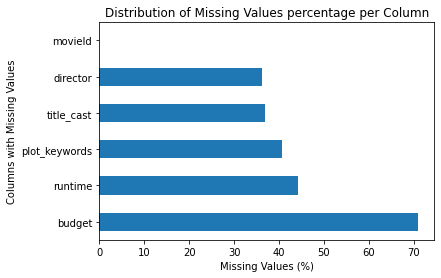

In [18]:
# The percentage of each column of missing values contained by imdb dataset
Sum = df_imdb.isnull().sum().sort_values(ascending=False)
percentage = df_imdb.isnull().sum()/df_imdb.isnull().count()*100
percentage_1 = (round(percentage, 1)).sort_values(ascending=False)
missing_values = pd.concat([Sum, percentage_1],
                         axis=1, keys=['Total', '(%) missing'])
missing_values['(%) missing'].plot(kind='barh')
plt.xlabel('Missing Values (%)')
plt.ylabel('Columns with Missing Values')
plt.title('Distribution of Missing Values percentage per Column')
plt.show()


There is a high number of movies without budget, director or title cast. Such high proportions of missing data largely disqualifies this particular set from our current modelling task.

Missing values present in the dataset can impact the performance of the model by creating a bias in the dataset. This bias can create a lack of relatability and trustworthiness in the dataset. The loss in values might contain crucial insights or information for model development.The values missing in the dataset can be missed intentionally, randomly, or missed out for a reason. So missing data is considered a problem and needs to be handled before proceeding to the next pipeline of model development.
At this stage, we will leave the null values in the dataset and only remove them if we see a need later in our analysis.

[<a href ="#Table-of-Contents">Back to table of contents</a>]

#### Duplicates
Another thing we need to look out for are duplicates. A large amount of duplicates in the data tend to increase the bias of the estimated coefficients and standard errors of the model. **Duplicates** are an extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting this subset of points

In [19]:
#Checking duplicate rows
duplicate_rows_df_training_dataset = merged_dataset[merged_dataset.duplicated()]
print('number of duplicate rows:', duplicate_rows_df_training_dataset.shape)

number of duplicate rows: (0, 6)


This indicates that there are no repeated rows in the dataset.

### Insights from Ratings data

### a.How are our ratings distributed throughout the dataset?

Lets use a pie chart to visualize this

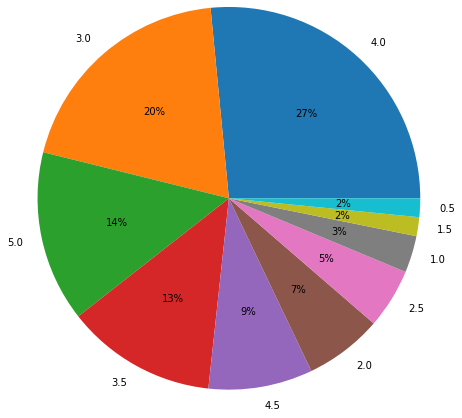

<Figure size 720x504 with 0 Axes>

In [20]:
train_movies=pd.merge(train,df_movies,how='left',on='movieId')
metadata=pd.merge(train_movies,df_imdb,how='left',on='movieId')

values = train['rating'].value_counts()/metadata.shape[0]
labels = (train['rating'].value_counts()/metadata.shape[0]).index
plt.pie(x=values, labels=labels,radius=2.2, autopct='%1.0f%%',startangle=0)
plt.figure(figsize = (10,7))

plt.show()

#### Insight:
- According to a study Anything higher than about a mid-3 is considered enviably high, and anything higher than a mid-3.5 is incredibly rare.Only a handful of 4s are given every year; 4.5s are reserved for best-of-the-decade or even best-of-the-genre material; The rating 5 is very rare.
- We observe a large amount of rating of 4 which shows that a large number of viewers in our dataset were substantially satisfied with the movies they watched. 
- We observe that ratings below 3 are rare in this case.


Lets further confirm this by viewing summary statistics of our ratings data

In [21]:
#Get summary statistics for ratings
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

This further confirms that the average rating is 3.5.



### b.How does the movies rating change as more people rate the movie?

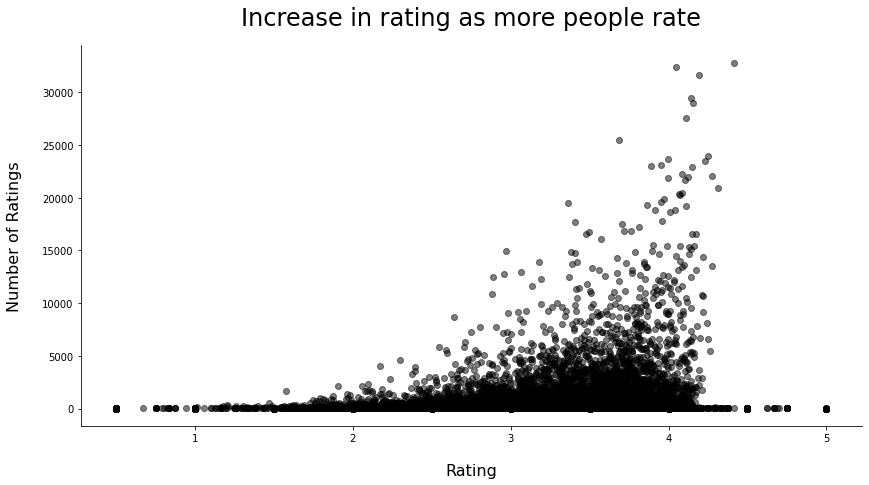

In [22]:
#create ratings dataframe
ratings_df = pd.DataFrame()

#extract average ratings
ratings_df['Mean_Rating'] = merged_dataset_3.groupby('title')['rating'].mean().values

#extract average number of ratings
ratings_df['Num_Ratings'] = merged_dataset_3.groupby('title')['rating'].count().values

#make a plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Increase in rating as more people rate', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5, color='black')

#### Insight:

The more a movie gets more ratings it’s average ratings tends to increase. This is because the more people that watch the movie the more ratings it gets and the more people talk about it and share it the more people like it, the movie is hyped. Also, if a lot of people are watching a movie, chances are that they like it and so they will rate it highly and share it with their friends and family.

### c.How have users rated movies on average over the years?

In [23]:
#create a review year column
from datetime import date
# Create list of date objects
rating_date_list = [
    date.fromtimestamp(timestamp) for timestamp in list(merged_dataset_3["timestamp"])]

# Create year column
merged_dataset_3["review_year"] = [date_item.year for date_item in rating_date_list]
merged_dataset_3.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,review_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2018
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2009


In [24]:
import plotly.express as px
# Get mean rating by year
mean_by_year = merged_dataset_3.groupby("review_year").mean()[["rating"]]

# Plot data
fig = px.line(x=mean_by_year.index, y=mean_by_year["rating"])
fig.update_layout(
    title="Average Rating Over Time", xaxis_title="Year", yaxis_title="Average rating"
)
fig.show()

The plot above shows that people tend to give lower ratings in recent years, this may be because of the availability of a variaty of movies in recent years, making users stricter when it comes to reviewing movies. However we can not ignore the possibility that our data is bias, maybe our data has more ratings for the more recent years causing them to average out to 3.5 and it has less data for the earlier years - year 2000 going back which means only a few ratings affect the average.

In [25]:
#dropping duplicates on dataframe
data_1= merged_dataset_3.drop_duplicates('movieId')
#Create dataframe
num_ratings = pd.DataFrame(merged_dataset_3.groupby('movieId').count()['rating']).reset_index()
#merge num ratings with df_merge3
merged_dataset_3 = pd.merge(left=merged_dataset_3, right=num_ratings, on='movieId')
# rename columns
merged_dataset_3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)
merged_dataset_3

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,review_year,numRatings
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2018,4253
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2009,4253
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2015,4253
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2014,4253
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2015,4253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633026,129077,66579,3.0,1446895942,"Lost, The (2009)",Thriller,Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...,Dan Dworkin,95.0,NaN,NaN,2015,1
9633027,78784,96316,3.5,1345995049,Aliisa (1970),Drama,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,NaN,NaN,janitor|income|housing problem|social problem,2012,1
9633028,80974,82732,3.0,1293164312,New York Confidential (1955),Crime|Drama|Film-Noir,NaN,NaN,NaN,NaN,NaN,2010,1
9633029,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War,Christopher R Swanson|Daniel Asher|Brian Banca...,Nick Day,112.0,"$600,000",soldier|italy|partisan|fascist,2014,1


### d.Which genres are in our dataset?

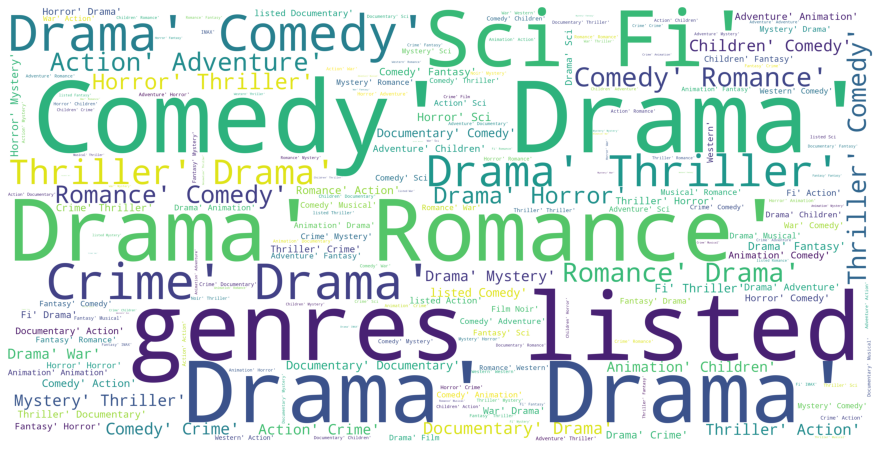

In [26]:
df_movies['release_year']=df_movies['title'].str[-5:-1] #here we are extracting released year
df_movies['genres']=df_movies['genres'].str.split('|') # then split the genres into a list
df_movies=pd.concat([df_movies,train['rating']],axis=1).dropna() #concatinate ratings with movies dataframe

# Create a wordcloud of the movie genres
df_movies['genres'] = df_movies['genres'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['genres'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

- Drama, Comedy and Rpmance are the winner genres
- Seems that Sci-Fi & Adventure are not as popular

[<a href ="#Table-of-Contents">Back to table of contents</a>]

### e.Which of our genres get the best ratings?

In [27]:
# function that will split the string and return the count for each genre.
def count_genre(x):
    
    """"
    This function will split
    the genres and return the count for each genre.
    ---------------------------------------------
    Input : dataframe column
    datatype : dataframe (integer)        
    ------------------------------
    output : Figure (pie chart)
    
    """
    
    #concatenate all the rows of the genres.
    data_plot = data_1[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_movies_genres = count_genre('genres')


Text(0.5, 1.0, 'Most popular genres\n')

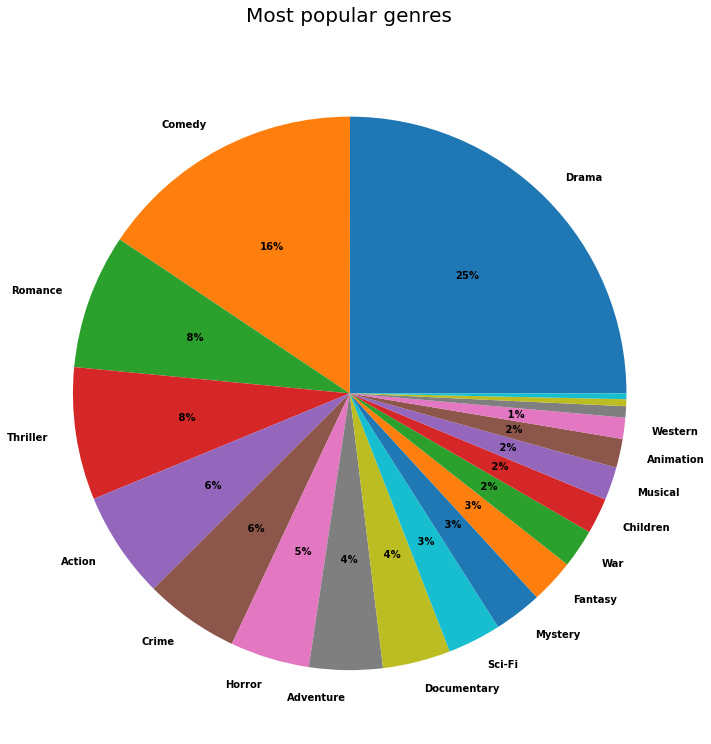

In [28]:
i = 0
# Create a list for the genre count
genre_count = []
#
for genre in total_movies_genres.index:
    genre_count.append([genre, total_movies_genres[i]])
    i = i+1
# Create a plot    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10, 10))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
# Plotting the pie chart
plt.tight_layout()
plt.title('Most popular genres\n', fontsize=20)

In [29]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split(','))


# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head(10)

,movieId,genres
0,1.0,['Adventure'
1,1.0,'Animation'
2,1.0,'Children'
3,1.0,'Comedy'
4,1.0,'Fantasy']
5,2.0,['Adventure'
6,2.0,'Children'
7,2.0,'Fantasy']
8,3.0,['Comedy'
9,3.0,'Romance']


Lets clean this genre column to get some insights from it.

In [30]:
def clean_text(text):
    """This function is to clean the data, removing punctuations, spaces and making text to be lowercase """
    
    text = text.lower() # making text to be lowercase 
      
    text =re.sub("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})", "", text) # removing all punctuation with no space
    
    text =re.sub("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).", " ", text) # removing all punctuation with a space
    
    text = re.sub("\\s+", " ", text)  # Remove extra whitespace
       
    text = re.sub(r"U+FFFD ", ' ', text) # Remove that funny diamond
    
    text = text.lstrip()  # removes whitespaces before string
    
    text = text.rstrip()  # removes whitespaces after string
    
    return text


In [31]:
movies_genres['genres'] = movies_genres['genres'].apply(clean_text)

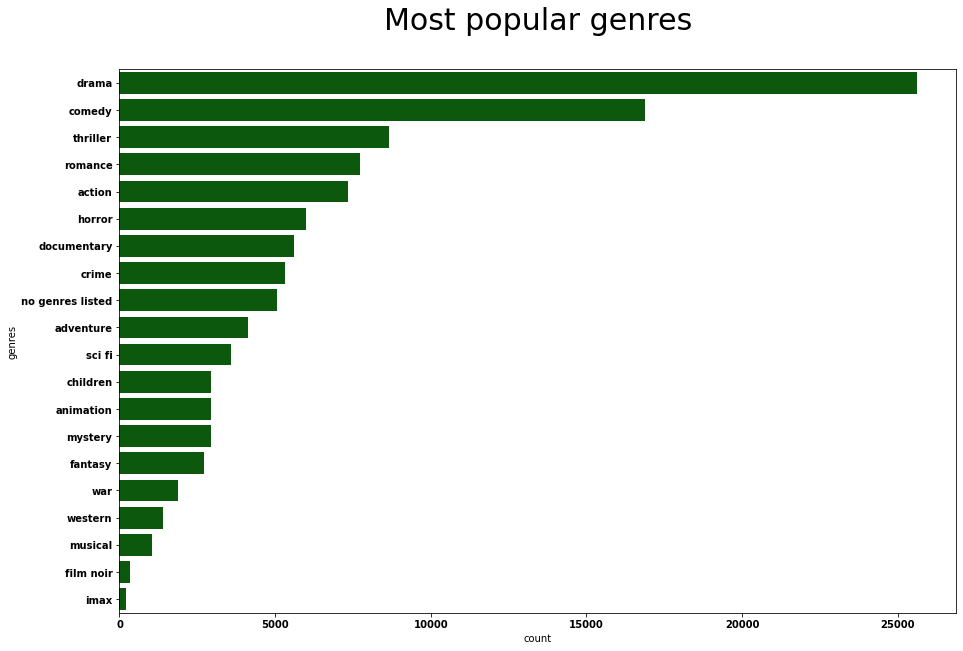

In [32]:
# Plot of genres from most popular genres
plot = plt.figure(figsize=(15, 10))
plt.title('Most popular genres\n', fontsize=30)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              color = 'darkgreen')
plt.show()

Looking at the plot above it is clear that Drama, Comedy and Thriller respectively have the highest number of ratings. Therefore we can expect that movies with a high number of ratings also have high number of viewers. 

### f.How many movies where released over the years?

Lets add a release_year column to represent when the movie was released.

In [33]:
# Create an empty list
years = []
# Finding the number of movies published in each year
for title in merged_dataset_3['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
# Create a new column in a dataframe.       
merged_dataset_3['release_year'] = years
#merged_dataset_3['release_year']=merged_dataset_3['title'].str[-5:-1]#extracting released year into a new clumn
# Drop rows with null values for movie_release_year
merged_dataset_3.dropna(subset=["release_year"], axis=0, inplace=True)

In [34]:
merged_dataset_3.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,review_year,numRatings,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2018,4253,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2009,4253,2008


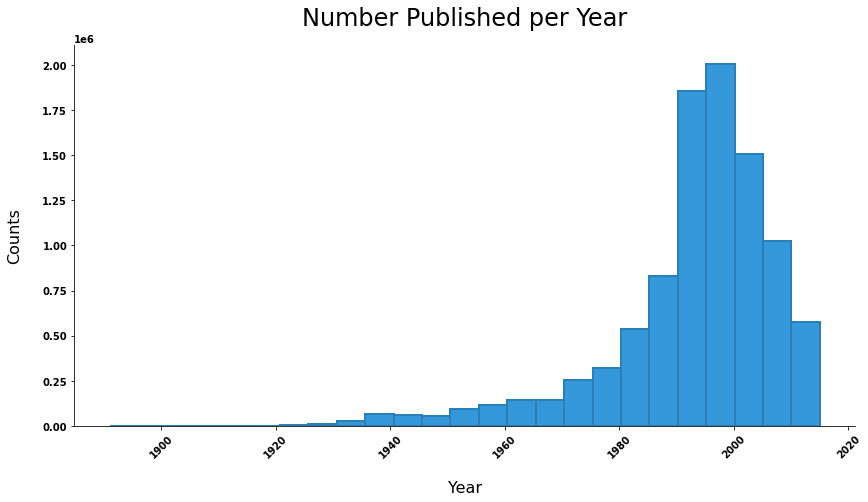

In [35]:
def plt_years(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', 
                   title='Title', xlab='X', ylab='Y', sort_index=False):
    """"
    This function gives a plot of the
    number of movies published per year
    
    Input : dataframe, dataframe column,
    bins, colour of figure, title of figure,
    x and y labels
    datatype : dataframe        
    
    output : Figure (bar plot)
    
    """
    if attribute == 'release_year':
        dataset = dataset[dataset['release_year'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
plt_years(merged_dataset_3, 'release_year', title='Number Published per Year', xlab='Year', ylab='Counts')

We can see that the most number of movies where released between 2008 and 2018 and there is a general increase in the number of movies made over the years, this supports our theory that the boom in movie production and participation by users is due to the improvement in movie technology over the years, allowing more rapid movie production.

### g.What are the most popular words used in movie titles?

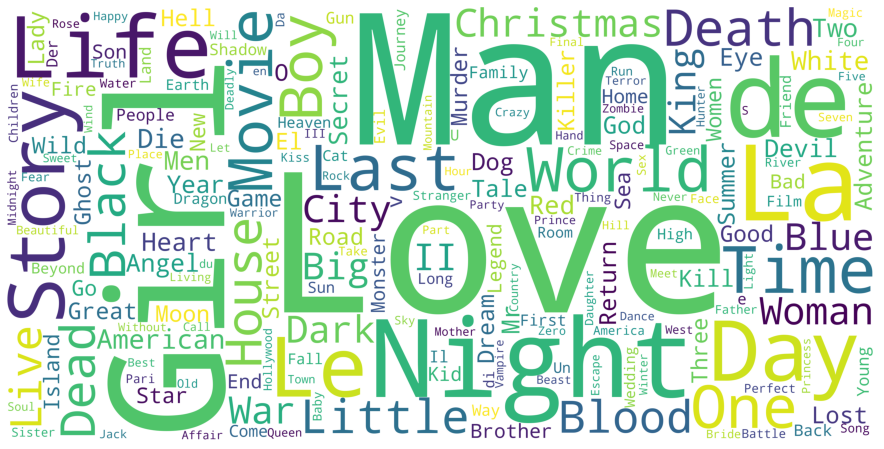

In [36]:
# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Some of the popular words used in movie names are "Love", "girl", "Man", "Night","Life", "Death".

[<a href ="#Table-of-Contents">Back to table of contents</a>]

### h.What are the Most Popular Movies based on their rating?

In [37]:
df_movies['release_year']=df_movies['title'].str[-5:-1] #here we are extracting released year
df_movies['genres']=df_movies['genres'].str.split('|') # then split the genres into a list
df_movies=pd.concat([df_movies,train['rating']],axis=1).dropna() #concatinate ratings with movies dataframe

In [38]:
def Most_popular_movies(dataframe_1,dataframe_2):
    
    """
    A function that returns the most popular movies based on 
    the avarage ratings and the total ratings count.

    Parameters
    ----------
    
    dataframe_1: DataFrame from the train_df
    dataframe_2: DataFrame from the movies_df
    
    Returns
    -------
    
    
    Dataframe of the most popular movies.
      
    """
   
   
    rating = pd.DataFrame(dataframe_1.groupby('movieId')['rating'].mean())#Calculating avarage rating and storing the results as a DataFrame
    
    rating['ratings_count'] = pd.DataFrame(dataframe_1.groupby('movieId')['rating'].count())#Calculating total ratings count and storing the results as a DataFrame
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()
    
    
    inner_join = pd.merge(rating,dataframe_2,on ='movieId',how ='inner')#Joining both DataFrames
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})
    
    return popular_movies


In [39]:
x=Most_popular_movies(train,df_movies) #display the extracted popular movies dataframe
x.head()

,title,rating,ratings_count,release_year
0,"Shawshank Redemption, The (1994)",4.417624,32831,1994
1,Forrest Gump (1994),4.047216,32383,1994
2,Pulp Fiction (1994),4.195097,31697,1994
3,"Silence of the Lambs, The (1991)",4.144172,29444,1991
4,"Matrix, The (1999)",4.154253,29014,1999


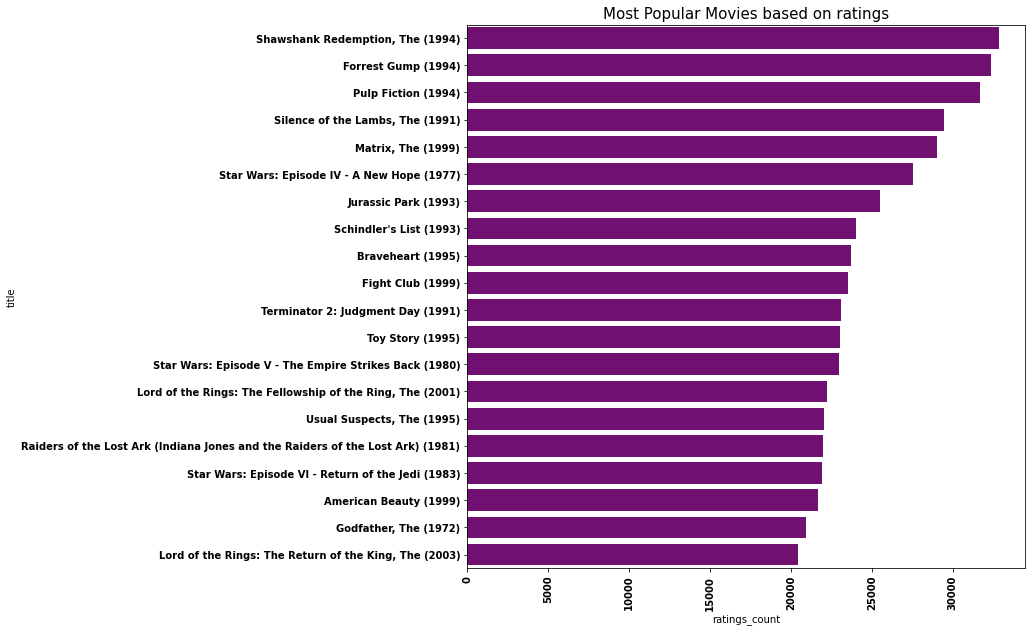

In [40]:
plt.figure(figsize = (10,10))#Bar plot of most popular movies by ratings
ax=sns.barplot(y='title', x='ratings_count', data=x.head(20),color='purple')
ax.set_title('Most Popular Movies based on ratings',fontsize=15)
plt.xticks(rotation=90)
plt.show()

A [research article](https://screenrant.com/shawshank-redemption-imdb-top-best-rated-movie-reason/) explains that The Shawshank Redemption is now widely considered one of the best films of all time.Moreover, movies that are science fiction and educational based movies promote creativity and improve people's experience, thereby increasing people's interests and eagerness to learn. From the plot above we see that Shawshank Redemption,Forrest Gump and Pulp Fiction are rated as the most popular movies.

### i.What were the most Expensive movies Made?

Lets transform the budget column to make it an integer.

In [41]:
# remove commas
merged_dataset_3['budget'] = merged_dataset_3['budget'].str.replace(',', '')

# remove currency signs like "$" and "GBP"
merged_dataset_3['budget'] = merged_dataset_3['budget'].str.extract('(\d+)', expand=False)

# convert the feature into a float
merged_dataset_3['budget'] = merged_dataset_3['budget'].astype(float)

# remove nan values and replacing with 0
merged_dataset_3['budget'] = merged_dataset_3['budget'].replace(np.nan, 0)

# convert the feature into an integer
merged_dataset_3['budget'] = merged_dataset_3['budget'].astype(int)

In [42]:
merged_dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   timestamp      int64  
 4   title          object 
 5   genres         object 
 6   title_cast     object 
 7   director       object 
 8   runtime        float64
 9   budget         int64  
 10  plot_keywords  object 
 11  review_year    int64  
 12  numRatings     int64  
 13  release_year   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ GB


In [43]:
budget_movies= merged_dataset_3[['title','budget']]
budget_movies= budget_movies.drop_duplicates('title')
budget_movies= budget_movies.sort_values(by=['budget'], ascending = False)
top_budget_movies=budget_movies[:10]
top_budget_movies

,title,budget
9563525,My Way (Mai Wei) (2011),30000000000
8943617,"Host, The (Gwoemul) (2006)",12215500000
9522278,Nameless Gangster (Bumchoiwaui junjaeng) (2012),10000000000
9632903,Chiedimi se sono felice (2000),7000000000
9134394,"Tale of Princess Kaguya, The (Kaguyahime no mo...",5000000000
9593791,The Cave of the Golden Rose (1991),5000000000
8275947,Lady Vengeance (Sympathy for Lady Vengeance) (...,4200000000
9370470,Joni's Promise (2005),3500000000
9542383,"Yobi, The Five-Tailed Fox (2007)",2700000000
8610309,Fateless (Sorstalanság) (2005),2500000000


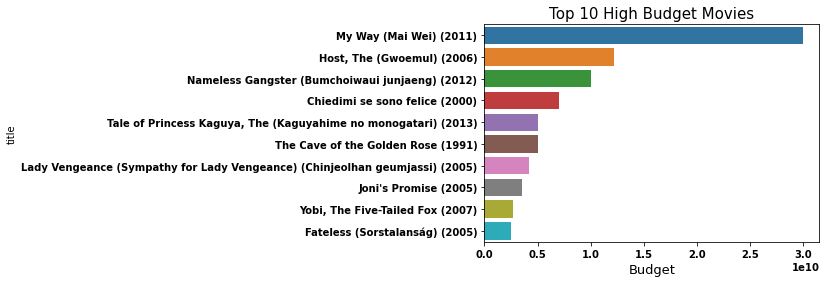

In [44]:
ax = sns.barplot(y=top_budget_movies['title'],x=top_budget_movies['budget'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

This graph is in tenths of billions. Meaning May Wei has a budget of approximately R30 Million Rands which sounds absurd but its $24 Million Dollors (which is still an absurd amount of money to spend on a movie).My Way was promoted as the most expensive Korean blockbuster yet produced. It has had a handful of cinema screenings in the UK courtesy of the Terracotta Film Festival and a most loved blockbuster by Koreans. Interesteingly enough, the second movie on our list is also a Korean movie  at about 1.3 Billion Rands.
What is most interesting is that all the top 10 movies are Korean movies which shows how much money Koreans are willing to spend on movie production and how much revenue they are expecting to regain, especially from their Korean supporters. This could be a good sign to make sure the company has a good stock of Korean movies to offer their users.

### j.Who are the movie directors who directed the most movies?

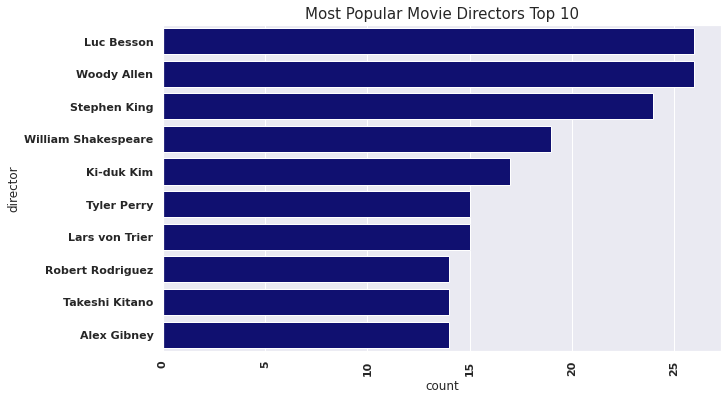

In [45]:
#Plotting top 10 movie directors using a count-plot
plt.figure(figsize = (10,6))
Movie_directors=df_imdb['director']#.explode()
axes=sns.countplot(y=Movie_directors, order = Movie_directors.value_counts().index[1:11],color='navy')
axes.set_title('Most Popular Movie Directors Top 10',fontsize=15)
plt.xticks(rotation=90)
plt.show()

- Number one on our list is Luc Besson. Luc Paul Maurice Besson is a French film director, screenwriter, and producer. He directed and produced the films Subway (1985), The Big Blue (1988), and La Femme Nikita (1990). Besson is associated with the Cinéma du look film movement. He has been nominated for a César Award for Best Director and Best Picture for his films Léon: The Professional and The Messenger: The Story of Joan of Arc. He won Best Director and Best French Director for his sci-fi action film The Fifth Element (1997). He wrote and directed the 2014 sci-fi action film Lucy and the 2017 space opera film Valerian and the City of a Thousand Planets.

- Woody Allen is an American film director, writer, actor, comedian, and musician, whose career spans more than six decades and multiple Academy Award-winning films. 

- Stephen King has received Bram Stoker Awards, World Fantasy Awards, and British Fantasy Society Awards. In 2003, the National Book Foundation awarded him the Medal for Distinguished Contribution to American Letters. He has also received awards for his contribution to literature for his entire bibliography, such as the 2004 World Fantasy Award for Life Achievement and the 2007 Grand Master Award from the Mystery Writers of America.

All of the directors above are well decorated and well loved directors who have directed many movies and plays throughout their careers

[<a href ="#Table-of-Contents">Back to table of contents</a>]

### k.Most Popular Actors

In [46]:
df_imdb['title_cast']=df_imdb['title_cast'].str.split('|') #spliting the title cast into a list
df_imdb['plot_keywords']=df_imdb['plot_keywords'].str.split('|') #spliting the Key words into a list


In [47]:
df_imdb['title_cast'] = df_imdb['title_cast'].str[0]
df_imdb

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks,John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,Robin Williams,Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,Walter Matthau,Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,Whitney Houston,Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,Steve Martin,Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"
...,...,...,...,...,...,...
27273,131254,Franz Dinda,Carsten Funke,85.0,NaN,"[man wrapped in a towel, man wears a thong, ma..."
27274,131256,Rick Kavanian,Matthias Dinter,83.0,"DEM5,800,000","[ski, ski resort, ampersand in title, drink in..."
27275,131258,Nam-gil Kim,Seong-il Cheon,130.0,NaN,"[pirate, sword fight, korea, bandit]"
27276,131260,Martti Suosalo,Timo Koivusalo,102.0,NaN,"[friend, friendship, television show, restaurant]"


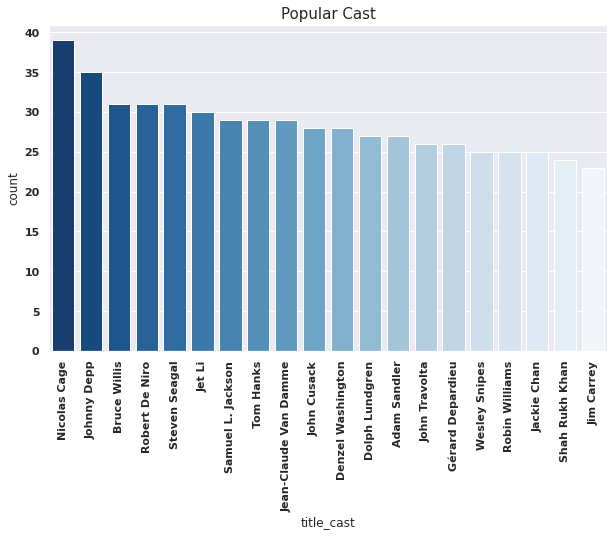

In [48]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
title_cast=df_imdb['title_cast']
axes=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],palette='Blues_r')
axes.set_title('Popular Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Nicolas Kim Coppola (born January 7, 1964),[2][3] known professionally as Nicolas Cage, is an American actor and filmmaker. Cage has been nominated for numerous major cinematic awards, and won an Academy Award, a Golden Globe, and Screen Actors Guild Award for his performance in Leaving Las Vegas (1995). He earned his second Academy Award nomination for his performance as Charlie and Donald Kaufman in Adaptation (2002).During his early career, Cage starred in a variety of films such as Rumble Fish (1983), Racing with the Moon (1984), Peggy Sue Got Married (1986), Raising Arizona (1987), Vampire's Kiss (1989), Wild at Heart (1990), Honeymoon in Vegas (1992), and Red Rock West (1993). During this period, John Willis' Screen World, Vol. 36 listed him as one of twelve Promising New Actors of 1984.After winning his Academy Award, Cage started starring in more mainstream films, such as The Rock (1996), Con Air (1997), City of Angels (1998), 8mm (1999), Windtalkers (2002), Lord of War (2005), The Wicker Man (2006), Bangkok Dangerous (2008) and Knowing (2009). He also directed the film Sonny (2002), for which he was nominated for Grand Special Prize at Deauville Film Festival. Cage owns the production company Saturn Films and has produced films such as Shadow of the Vampire (2000) and The Life of David Gale (2003). In October 1997, Cage was ranked No. 40 in Empire magazine's The Top 100 Movie Stars of All Time list, while the next year, he was placed No. 37 in Premiere's 100 most powerful people in Hollywood.In the 2010s, he starred in Kick-Ass (2010), Drive Angry (2011), Joe (2013), The Runner (2015), Dog Eat Dog (2016), Mom and Dad (2017), Mandy (2018) and Color Out of Space (2019). His participation in various film genres during this time increased his popularity and gained him a cult following

In [49]:
# make a copy of the train and test datasets to work on
train_copy = train.copy()
df_test = test_df.copy()
# remove the timestamp column from the copy in order to be able to build models on train data that matches the test data
# we will evaluate the importance of the time stamp column later
train_copy = train_copy.drop('timestamp', axis = 1)
train_copy

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0
...,...,...,...
10000033,136395,99114,5.0
10000034,140078,553,3.0
10000035,154807,56782,4.0
10000036,85805,327,4.0


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8. Building Models

# 8.1. Content based filtering recommender system

We will use Content based filtering to come up with 10 recommendations of a movie after the user enters a movie that they like. Therefore if a user gives us a movie that they like we will be able to predict other movies that they might also enjoy watching.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/KeletsoPule-dev/unsupervised-predict-streamlit-template/master/content.png"
     alt="Content"
     style="float: center; padding-bottom=0.5em"
     width=200px/>

</div>

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

#### Model 1 : Content Based

In [50]:
# function to preprocess data
# we use a subset of the data for computation purposes
def data_preprocessing (subset_size = 12000):
    
    # Inner join the imdb dataframe with the movies dataframe
    imdb = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
    merge = imdb.merge(df_movies[['movieId', 'genres', 'title']], on='movieId', how='inner')

    # Convert data types to string in order to do string manipulation
    merge['title_cast'] = merge.title_cast.astype(str)
    merge['plot_keywords'] = merge.plot_keywords.astype(str)
    merge['genres'] = merge.genres.astype(str)
    merge['director'] = merge.director.astype(str)

    # clean directors and title_cast column
    # remove spaces and "|"
    merge['director'] = merge['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
    merge['title_cast'] = merge['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))
    merge['title_cast'] = merge['title_cast'].map(lambda x: x.split('|'))
    #convert title cast back to string and remove commas
    merge['title_cast'] = merge['title_cast'].apply(lambda x: ','.join(map(str, x)))
    merge['title_cast'] = merge['title_cast'].replace(',',' ', regex=True)
    
    # clean plot keywords column
    # remove spaces and "|"
    merge['plot_keywords'] = merge['plot_keywords'].map(lambda x: x.split('|'))
    merge['plot_keywords'] = merge['plot_keywords'].apply(lambda x: " ".join(x))

    # clean plot genres column
    # remove spaces and "|" 
    merge['genres'] = merge['genres'].map(lambda x: x.lower().split('|'))
    merge['genres'] = merge['genres'].apply(lambda x: " ".join(x))

    
    #subset table to only return required columns
    df_features = merge[['title_cast','director','plot_keywords','genres']]

    #we combine the features columns into  single string
    merge['combined_features'] = df_features['title_cast'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']
    merge_subset = merge[:subset_size]
    
    return merge_subset

In [51]:
processed_df = data_preprocessing(12000)
processed_df

,movieId,title_cast,director,plot_keywords,genres,title,combined_features
0,1,tomhanks,johnlasseter,"['toy', 'rivalry', 'cowboy', 'cgi animation']","[""['adventure', 'animation', 'children', 'come...",Toy Story (1995),"tomhanks johnlasseter ['toy', 'rivalry', 'cowb..."
1,2,robinwilliams,jonathanhensleigh,"['board game', 'adventurer', 'fight', 'game']","[""['adventure', 'children', 'fantasy']""]",Jumanji (1995),"robinwilliams jonathanhensleigh ['board game',..."
2,3,waltermatthau,markstevenjohnson,"['boat', 'lake', 'neighbor', 'rivalry']","[""['comedy', 'romance']""]",Grumpier Old Men (1995),"waltermatthau markstevenjohnson ['boat', 'lake..."
3,4,whitneyhouston,terrymcmillan,"['black american', 'husband wife relationship'...","[""['comedy', 'drama', 'romance']""]",Waiting to Exhale (1995),whitneyhouston terrymcmillan ['black american'...
4,5,stevemartin,alberthackett,"['fatherhood', 'doberman', 'dog', 'mansion']","[""['comedy']""]",Father of the Bride Part II (1995),"stevemartin alberthackett ['fatherhood', 'dobe..."
...,...,...,...,...,...,...,...
11995,56702,casparzafer,vicentearanda,"['15th century', '1400s', 'year 1401', 'consta...","[""['adventure']""]","Maidens' Conspiracy, The (Tirante el Blanco) (...","casparzafer vicentearanda ['15th century', '14..."
11996,56715,willarnett,gorandukic,"['suicide', 'hitchhiker', 'afterlife', 'road t...","[""['drama', 'fantasy', 'romance']""]",Wristcutters: A Love Story (2006),"willarnett gorandukic ['suicide', 'hitchhiker'..."
11997,56719,fabrizioborsani,peterluisi,"['prodigy', 'deception', 'falling out a window...","[""['drama']""]",Vitus (2006),"fabrizioborsani peterluisi ['prodigy', 'decept..."
11998,56744,leeboardman,petermorgan,"['character name as title', 'murder of a child...","[""['crime', 'drama']""]",Longford (2006),leeboardman petermorgan ['character name as ti...


In [52]:
#Create a count vectorizer to use in our model
cv = CountVectorizer()
cv_model = cv.fit_transform(processed_df['combined_features'])

In [53]:
def content_test(movie_list,top_n=10):
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    processed_df = data_preprocessing(12000)
    # Instantiating and generating the count matrix
    cv = CountVectorizer()
    cv_model = cv.fit_transform(processed_df['combined_features'])
    indices = pd.DataFrame(processed_df.index)
    cosine_sim = cosine_similarity(cv_model, cv_model)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_1).append(score_series_3).sort_values(ascending = False)

    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(df_movies['title'])[i])
    return recommended_movies

In [54]:
movie_list = ['Toy Story 2 (1999)',
 'DuckTales: The Movie - Treasure of the Lost Lamp (1990)',
 "Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)"]
content_test(movie_list,10)

['Wallace & Gromit: The Wrong Trousers (1993)',
 'Shadrach (1998)',
 'End of Days (1999)',
 "Dude, Where's My Car? (2000)",
 'Angel Eyes (2001)',
 'StageFright: Aquarius (1987)',
 'Terminal Man, The (1974)',
 '300 Miles to Heaven (300 Mil do Nieba) (1989)',
 'Deep Blue (2003)',
 'Man of the West (1958)']

In [55]:
#function to obtain recommendations
def content_model(title,n):
    '''
    title: title that user will enter
    n: the number of recommendations required
    cv_matrix: unpickled countvecorizer
    
    '''
    cv = CountVectorizer()
    cv_model = cv.fit_transform(processed_df['combined_features'])
    #set title column as the index and create a dataframe of titles
    processed_df.set_index('title', inplace = True)
    indices = pd.DataFrame(processed_df.index)
    #create the cosine similarity matrix using the count vectorizer
    sim_score = cosine_similarity(cv_model,cv_model)
    
    #create an empty list of the recommended movies
    recommended_movies = []
    
    # match the entered title to its index in the titles dataframe
    idx = indices[indices == title].index[0]

    # get the similarity scores from highest to lowest
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # create a list of the top nth title indexes from the similarity matrix
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    # add the titles that match the indexes to the list
    for i in top_n_indexes:
        recommended_movies.append(list(processed_df.index)[i])
        
    return recommended_movies

In [56]:
content_model('Toy Story 2 (1999)', 10)

['Toy Story 2 (1999)',
 "Happily N'Ever After (2007)",
 'Tekkonkinkreet (Tekkon kinkurîto) (2006)',
 'Wild, The (2006)',
 "Emperor's New Groove, The (2000)",
 'Valiant (2005)',
 'Shrek the Third (2007)',
 'Ant Bully, The (2006)',
 'Aqua Teen Hunger Force Colon Movie Film for Theaters (2007)',
 'Troll in Central Park, A (1994)']

[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8.2. Collaborative based ratings predictor

In [57]:
#Load the data using the surprise package
train_df_subset = train_copy[:100000] # use a subset of the data in order to make it easier to compute

In [58]:
reader = Reader(rating_scale=(0.5, 5))

In [59]:
train_subset_data = Dataset.load_from_df(train_df_subset[['userId', 'movieId', 'rating']], reader)

In [60]:
Train, test = train_test_split(train_subset_data, test_size=.25, random_state=42)

# 8.2.1. SVD Model
 Singular value decomposition (SVD) is a method of representing a matrix as a series of linear approximations that expose the underlying meaning-structure of the matrix. The goal of SVD is to find the optimal set of factors that best predict the outcome.

In [61]:
svd = SVD(random_state=42)
svd.fit(Train)
predictions = svd.test(test)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9827


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8.2.2. BaselineOnly Model
 A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset.

In [62]:
blo = BaselineOnly()
blo.fit(Train)
predictions = blo.test(test)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9843


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8.2.3. NMF Non negative Matrix Factorization Model
 Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements.

In [63]:
nmf = NMF()
nmf.fit(Train)
predictions = nmf.test(test)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1606


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8.2.4. SlopeOne

In [64]:
so = SlopeOne()
so.fit(Train)
predictions = so.test(test)
# Calculate RMSE
so_rmse = accuracy.rmse(predictions)

RMSE: 1.1598


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8.2.5. Co-Clustering
 Biclustering, block clustering, co-clustering, or two-mode clustering is a data mining technique which allows simultaneous clustering of the rows and columns of a matrix.

In [65]:
cc = CoClustering(random_state=42)
cc.fit(Train)
predictions = cc.test(test)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

RMSE: 1.1514


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8.2.6. Hyper parametertuning on best models (SVD)
  We used Hyper parameter tuning on SVD Model to control the learning process so that we can better our model.

In [66]:
params = {'n_epochs':[40], 
              'n_factors':[400], 
              'init_std_dev':[0.005], 
              'random_state':[42]} 
grids_svd = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=params, n_jobs=-1)
grids_svd.fit(train_subset_data)
print(grids_svd.best_score['rmse'])
print(grids_svd.best_params['rmse'])

0.9672739174421168
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


In [67]:
# apply tuning to the svd model 
svd_tuned = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_tuned.fit(Train)
predictions = svd_tuned.test(test)
# Calculate RMSE
svd_tuned_rmse = accuracy.rmse(predictions)

RMSE: 0.9734


[<a href ="#Table-of-Contents">Back to table of contents</a>]

#### Train the best model with the full dataset

Note!!! This process takes up a lot of computational power to run due to our dataset being so large.

In [68]:
'''#Load the data using the surprise package
reader = Reader(rating_scale=(0.5, 5))
train_data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
train_dataset = train_data.build_full_trainset()'''

"#Load the data using the surprise package\nreader = Reader(rating_scale=(0.5, 5))\ntrain_data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)\ntrain_dataset = train_data.build_full_trainset()"

In [69]:
'''# apply tuning to the svd model 
svd_tuned = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_tuned.fit(train_dataset)'''

'# apply tuning to the svd model \nsvd_tuned = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)\nsvd_tuned.fit(train_dataset)'

In [70]:
''''#apply trained model to test data
predictions=[svd_tuned.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]'''

"'#apply trained model to test data\npredictions=[svd_tuned.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]"

In [71]:
'''df_pred = pd.DataFrame(predictions)
df_pred'''

'df_pred = pd.DataFrame(predictions)\ndf_pred'

In [72]:
''''# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})'''


"'# Renaming our predictions to original names\ndf_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})"

In [73]:
''''# Drop the columns not required for the submission
df_pred.drop(['r_ui','details'],axis=1,inplace=True)'''

"'# Drop the columns not required for the submission\ndf_pred.drop(['r_ui','details'],axis=1,inplace=True)"

In [74]:
'''# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)'''


"# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)\ndf_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)\ndf_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)"

In [75]:
'''# Saving each metric to add to a dictionary for logging
rmse = accuracy.rmse(predictions)

# Create dictionaries for the data we want to log          
metrics = {"rmse": rmse}

params= {'classifier': 'svd',
         random state': '42'}
  
# Log info on comet
experiment.log_metrics(rmse)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display() '''

'# Saving each metric to add to a dictionary for logging\nrmse = accuracy.rmse(predictions)\n\n# Create dictionaries for the data we want to log          \nmetrics = {"rmse": rmse}\n\nparams= {\'classifier\': \'svd\',\n         random state\': \'42\'}\n  \n# Log info on comet\nexperiment.log_metrics(rmse)\nexperiment.log_parameters(params)\n\n# End experiment\nexperiment.end()\n\n# Display results on comet page\nexperiment.display() '

## Create CSV file for the Kaggle submission competition 

In [76]:
'''# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
#Change positioning of columns
df_pred = df_pred[['Id', 'rating']]
# Create Submission file
df_pred.to_csv("svd_tuned_googlecloud1.csv", index=False)
df_pred'''

'# Drop the features that will not be required for the submission\ndf_pred.drop([\'userId\', \'movieId\'], inplace=True, axis= 1)\n#Change positioning of columns\ndf_pred = df_pred[[\'Id\', \'rating\']]\n# Create Submission file\ndf_pred.to_csv("svd_tuned_googlecloud1.csv", index=False)\ndf_pred'

[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 8.3. Collaborative based recommender
We will use Collaborative based filtering to come up with ratings predictions based on the UserID and MovieID. Therefore    we will be able to predict what the user will rate a movie based on the User and the Movie.


<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/KeletsoPule-dev/unsupervised-predict-streamlit-template/master/collaborative.png"
     alt="Collab"
     style="float: center; padding-bottom=0.5em"
     width=300px/>

</div>

Collaborative filtering is a class of recommenders that leverage only the past user-item interactions in the form of a ratings matrix. It operates under the assumption that similar users will have similar likes.

In [80]:
# Data Preprocessing
train_subset = train_copy[:100000]## Here
movietitle = pd.merge(train,df_movies, on= 'movieId', how = 'left')### Here
movietitle = movietitle.drop(['genres','userId','timestamp', 'rating_x','rating_y','rating_y' ], axis = 1)
movietitle = movietitle.drop_duplicates()
movietitle = movietitle.dropna()

In [81]:
#Build a model usind svd
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd.fit(Train)


In [82]:
#pickle the model for use later
import pickle

model_save_path = "tunedSVD_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svd,file)

In [83]:
def prediction_item(item_id):
    
    # load a subset of the data
    train_subset = train_copy[:100000]
    reader = Reader(rating_scale=(0, 5))
    load_df = Dataset.load_from_df(train_subset[['userId','movieId','rating']],reader)
    a_train = load_df.build_full_trainset()

    predictions = []
    for ui in a_train.all_users():
        predictions.append(svd.predict(iid=item_id,uid=ui, verbose = False))
    return predictions

In [84]:
def pred_movies(movie_list):
  
    # Store the id of users
    id_store=[]
    # For each movie selected by a user of the app,
    # predict a corresponding user within the dataset with the highest rating
    for i in movie_list:
        predictions = prediction_item(item_id = i)
        predictions.sort(key=lambda x: x.est, reverse=True)
        # Take the top 10 user id's from each movie with highest rankings
        for pred in predictions[:10]:
            id_store.append(pred.uid)
    # Return a list of user id's
    return id_store

In [85]:
def collab_model(movie_list,top_n=10):

    # indices1 = pd.Series(movies['title'])
    movie_ids = pred_movies(movie_list)
    df_init_users = train_subset[train_subset['userId']==movie_ids[0]]
    for i in movie_ids[1:]:
        df_init_users=df_init_users.append(train_subset[train_subset['userId']==i])
        
    # Getting the user-item matrix
    df_init_users = pd.merge(df_init_users, movietitle, on = 'movieId', how = 'left')
    df_init_users = df_init_users.dropna()
    users_matrix = df_init_users.groupby(['title','userId'])['rating'].max().unstack()
    for i in movie_list:
        if i not in users_matrix.index.values.tolist():
            df_nan = pd.DataFrame([[(np.NaN)]*len(users_matrix.columns)], index = [i], columns = users_matrix.columns)
            users_matrix = users_matrix.append(df_nan)
            
    # Getting the cosine similarity matrix
    cosine_sim = cosine_similarity(users_matrix.fillna(0))
    indices = pd.Series(users_matrix.index)
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    
    # Appending the names of movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)
    recommended_movies = []
    
    # Choose top 50
    top_50_indx = list(listings.iloc[1:50].index)
    
    # Removing chosen movies
    top_indx = np.setdiff1d(top_50_indx,[idx_1,idx_2,idx_3])
    random.shuffle(top_indx)
    for j in top_indx[:top_n]:
        recommended_movies.append(indices[j])
        
    return recommended_movies

In [86]:
collab_model(movie_list, 10)

['Batman Forever (1995)',
 'Easy Rider (1969)',
 'Robin Hood (1973)',
 'Harry Potter and the Chamber of Secrets (2002)',
 'Hercules (1997)',
 'Fires on the Plain (Nobi) (1959)',
 'Self/less (2015)',
 'Home Alone (1990)',
 'Man in the Iron Mask, The (1998)',
 'Riddick (2013)']

# 9. Conclusion

In this notebook we have built recommendation engines which were based on different techniques and ideas.

We have found a certain amount of success using the SVD Model which utilised Hyperparameter tuning to control the learning process. The success of our model was influenced by various factors including the way we preprocessed our data and how we tuned the parameters to ensure that we choose a set of optimal hyperparameters for our learning algorithm.

Furthermore, we put an enormous of effort and detail into our Exploratory Data Analysis to assist us in determining the best possible ways to manipulate our data allowing us to deliver optimal interpretation into our dataset and determine optimal factor settings.

We found it highly valuable to answer questions which we anticipate most movie platforms to have to ensure ultimate satisfaction to their users. Questions such as “ Who are the most popular actors?’,’Which genres get the best ratings?’ would allow platforms to gain valuable insight and would allow for improvement.

With these means we built a model-driven app which provided greater context to the problem and attempted solutions through additional application pages. This app would allow one to enter three of their favourite movies and accurately predict how a user will rate a movie they have not yet viewed based on their historical preferences.

With all these means and by building on crucial knowledge through research our team has contributed to finding a solution to help movie viewers to be exposed to content they would like to view or purchase , increase engagement with movie viewers and platforms; and deliver more personalized customer experiences

[<a href ="#Table-of-Contents">Back to table of contents</a>]